Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


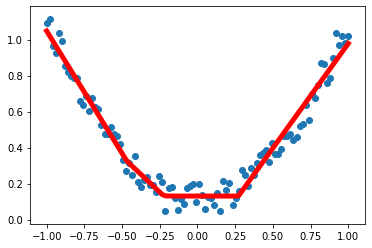

In [62]:
import torch 
from torch.autograd import Variable 
import torch.nn.functional as F 
import matplotlib.pyplot as plt 
  
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # 将1维的数据转换为2维数据 
y = x.pow(2) + 0.2 * torch.rand(x.size()) 
  
# 将tensor置入Variable中 
x, y = Variable(x), Variable(y) 
  
#plt.scatter(x.data.numpy(), y.data.numpy()) 
#plt.show() 
  
# 定义一个构建神经网络的类 
class Net(torch.nn.Module): 
    # 继承torch.nn.Module类 
    def __init__(self, n_feature, n_hidden, n_output): 
        
        super(Net, self).__init__() # 获得Net类的超类（父类）的构造方法 
        # 定义神经网络的每层结构形式 
        # 各个层的信息都是Net类对象的属性 
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 隐藏层线性输出 
        self.predict = torch.nn.Linear(n_hidden, n_output) # 输出层线性输出 
  
  # 将各层的神经元搭建成完整的神经网络的前向通路 
    def forward(self, x): 
        x = F.relu(self.hidden(x)) # 对隐藏层的输出进行relu激活 
        x = self.predict(x) 
        return x 
# 定义神经网络 
net = Net(1, 10, 1) 
print(net) # 打印输出net的结构 
  
# 定义优化器和损失函数 
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) # 传入网络参数和学习率 
loss_function = torch.nn.MSELoss() # 最小均方误差 
  
# 神经网络训练过程 
plt.ion()  # 动态学习过程展示 
plt.show() 
  
for t in range(300): 
    prediction = net(x) # 把数据x喂给net，输出预测值 
    loss = loss_function(prediction, y) # 计算两者的误差，要注意两个参数的顺序 
    
    optimizer.zero_grad() # 清空上一步的更新参数值 
    loss.backward() # 误差反相传播，计算新的更新参数值 
    optimizer.step() # 将计算得到的更新值赋给net.parameters() 
  
  # 可视化训练过程 
    if (t+1) % 10 == 0: 
        plt.cla() 
        plt.scatter(x.data.numpy(), y.data.numpy()) 
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5) 
#         plt.text(0.5, 0, 'L=%.4f' % loss.data[0], fontdict={'size': 20, 'color': 'red'}) 
#         plt.pause(0.1)

In [32]:
vgg = models.vgg16().to('cpu')
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [33]:
summary(vgg.cpu(), (3, 224, 224))

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

In [12]:
base = [64,64,64,64,64,64]

def vgg(cfg, batch_norm=False):
    layers = []
    in_channels = 1
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool3d(kernel_size=(2, 2, 2), stride=2)]
        elif v == 'C':
            layers += [nn.MaxPool3d(kernel_size=2, stride=2, ceil_mode=True)]
        else:
            conv3d = nn.Conv3d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv3d, nn.BatchNorm3d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv3d, nn.ReLU(inplace=True)]
            in_channels=v
    return layers